In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import tools 
from model import model_class as model
import time

plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('axes', axisbelow=True)

# Setup model
model = model()
model.setup()
model.create_grids()

In [15]:
# Solve using NEGM
model.par.y1 = 1.0
model.par.ph = 2.0
model.par.p0 = 1.7
model.par.beta = 0.98
model.par.r = 0.01
model.par.eta = 2.0
model.par.m_max = 10
model.par.max_iter = 500
model.create_grids()
model.solve_negm_dc()
sol_negm = model.sol_negm
par = model.par

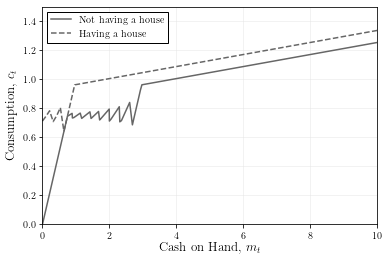

In [17]:
# Generate figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Settings
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.set_xlim([0.0,10])
ax.set_ylim([0.0,1.5])

ax.set_xlabel(r'Cash on Hand, $m_t$', size=13)
ax.set_ylabel(r'Consumption, $c_t$', size=13)

# Plot
ax.plot(model.sol_negm.m[0,:],model.sol_negm.c[0,:], label= r'Not having a house', linestyle = '-', color = '0.4')
ax.plot(model.sol_negm.m[1,:],model.sol_negm.c[1,:], label= r'Having a house', linestyle = '--', color = '0.4')

ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False, loc = 2)
# plt.savefig('figs/negm_dc_policy_c.pdf')

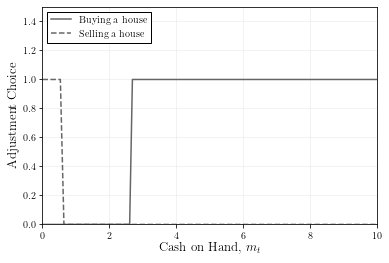

In [18]:
# Generate figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Settings
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.set_xlim([0.0,10])
ax.set_ylim([0.0,1.5])

ax.set_xlabel(r'Cash on Hand, $m_t$', size=13)
ax.set_ylabel(r'Adjustment Choice', size=13)

# Plot
ax.plot(model.sol_negm.m[0,:],model.sol_negm.h[0,:], label= r'Buying a house', linestyle = '-', color = '0.4')
ax.plot(model.sol_negm.m[1,:],1-model.sol_negm.h[1,:], label= r'Selling a house', linestyle = '--', color = '0.4')

ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False, loc = 2)
# plt.savefig('figs/negm_dc_policy_h.pdf')

Time solution algoritms and measure accuracy

In [11]:
model.par.y1 = 1.0
model.par.ph = 2.0
model.par.p0 = 1.7
model.par.r = 0.045
model.par.m_max = 10
model.create_grids()

t0 = time.time()
model.solve_negm_dc()
t1 = time.time()

negm_time = t1-t0

Solve on fine grid

In [21]:
# model.par.y1 = 1.0
# model.par.ph = 2.0
# model.par.p0 = 1.7
model.par.Nm = 500
# model.par.r = 0.045
model.par.m_max = 10
model.create_grids()

t0 = time.time()
model.solve_negm_dc()
t1 = time.time()

negm_time = t1 - t0

In [22]:
print(negm_time)
print(model.sol_negm.it)

26.87066626548767
365


In [29]:
model.setup()
model.create_grids()

t0 = time.time()
model.solve_vfi_dc()
t1 = time.time()

nvfi_time = t1-t0

In [ ]:
print(nvfi_time)
print(model.sol_nvfi.it)

In [ ]:
# Runs fd_lcp script, which creates both figures and timings
%run fd_lcp.py